In [ ]:
import pandas as pd

# Load the dataset
file_path = 'nyc_temperature.csv'

nyc_weather_data = pd.read_csv(file_path)
nyc_weather_data.replace('T', 0, inplace=True)
# Display the first few rows of the dataset to understand its structure
nyc_weather_data.head()

,date,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
0,1/1/19,60,40,50.0,13.9,15,0,0.08,0,0
1,2/1/19,41,35,38.0,2.1,27,0,0,0,0
2,3/1/19,45,39,42.0,6.3,23,0,0,0,0
3,4/1/19,47,37,42.0,6.5,23,0,0,0,0
4,5/1/19,47,42,44.5,9.1,20,0,0.45,0,0


In [ ]:
pip install prophet

In [36]:
# Convert 'date' to datetime and prepare the dataframe
nyc_weather_data['date'] = pd.to_datetime(nyc_weather_data['date'], format='%d/%m/%y')
prophet_df = nyc_weather_data[['date', 'HDD']].copy()
prophet_df.rename(columns={'date': 'ds', 'HDD': 'y'}, inplace=True)

In [ ]:
from prophet import Prophet

model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgsbta7hz/lrws3z5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgsbta7hz/_nph38qm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64406', 'data', 'file=/tmp/tmpgsbta7hz/lrws3z5n.json', 'init=/tmp/tmpgsbta7hz/_nph38qm.json', 'output', 'file=/tmp/tmpgsbta7hz/prophet_modelkuu83wf9/prophet_model-20231125193212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:32:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:32:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# For example, forecasting for the next 365 days
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

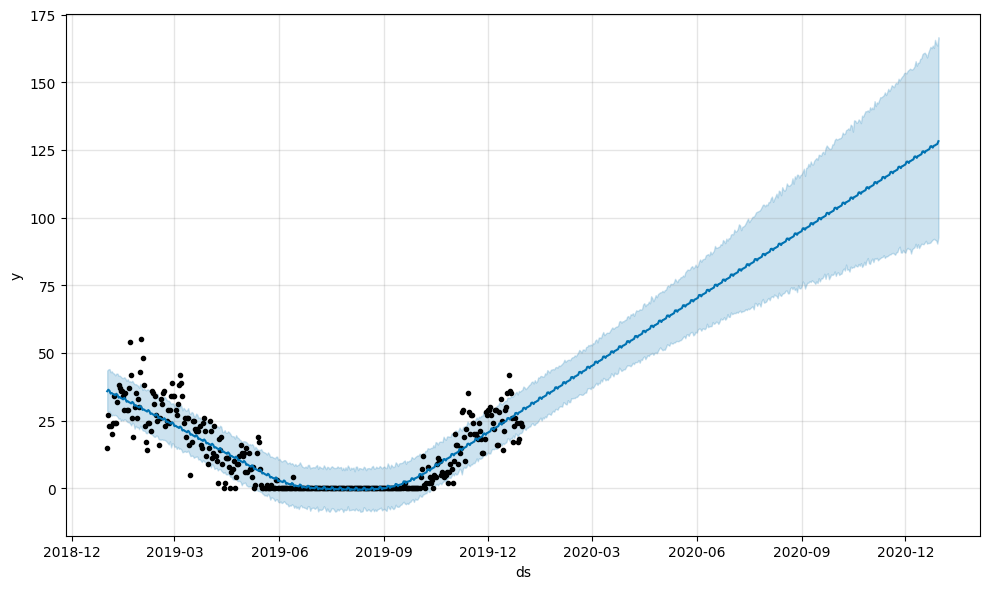

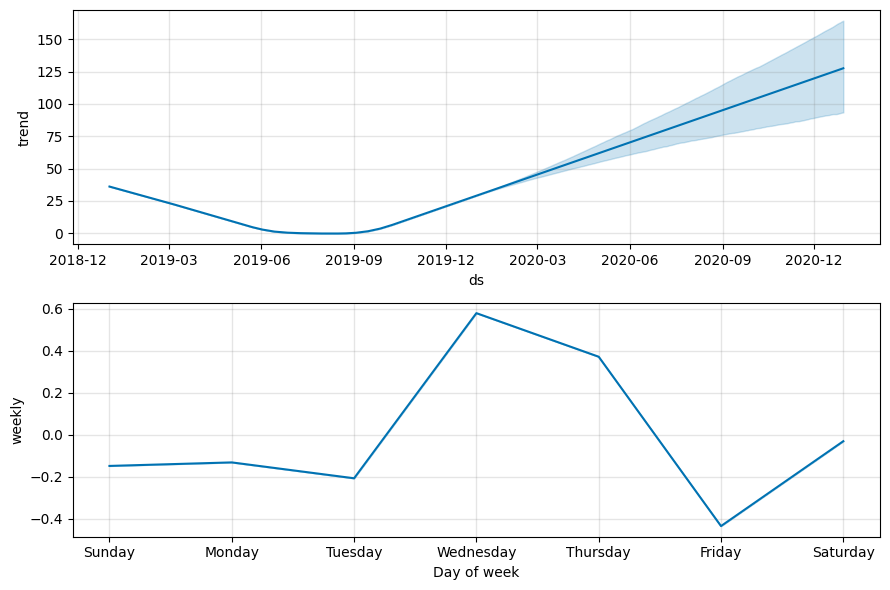

In [ ]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [58]:
# Load the new dataset
new_file_path = 'NYC_Central_Park_weather.csv'
nyc_new_weather_data = pd.read_csv(new_file_path)
nyc_new_weather_data.replace('T', 0, inplace=True)
nyc_new_weather_data['DATE'] = pd.to_datetime(nyc_new_weather_data['DATE'])

# Sort the data by the 'DATE' column in ascending order
nyc_new_weather_data.sort_values(by='DATE', inplace=True)
# Display the first few rows of the new dataset to understand its structure
nyc_new_weather_data.head()

,DATE,PRCP,SNOW,SNWD,TMIN,TMAX
0,1869-01-01,0.75,9.0,NaN,19.0,29.0
1,1869-01-02,0.03,0.0,NaN,21.0,27.0
2,1869-01-03,0.00,0.0,NaN,27.0,35.0
3,1869-01-04,0.18,0.0,NaN,34.0,37.0
4,1869-01-05,0.05,0.0,NaN,37.0,43.0


In [63]:
prophet_df = nyc_new_weather_data[['DATE', 'TMAX']].copy()
prophet_df.rename(columns={'DATE': 'ds', 'TMAX': 'y'}, inplace=True)


In [64]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgsbta7hz/2a1dwccj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgsbta7hz/bdtrcukz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75572', 'data', 'file=/tmp/tmpgsbta7hz/2a1dwccj.json', 'init=/tmp/tmpgsbta7hz/bdtrcukz.json', 'output', 'file=/tmp/tmpgsbta7hz/prophet_modelll5cuh4i/prophet_model-20231125195758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:57:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:58:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [67]:
future = model.make_future_dataframe(periods=365*10)  # for example, forecasting 1 year into the future
forecast = model.predict(future)

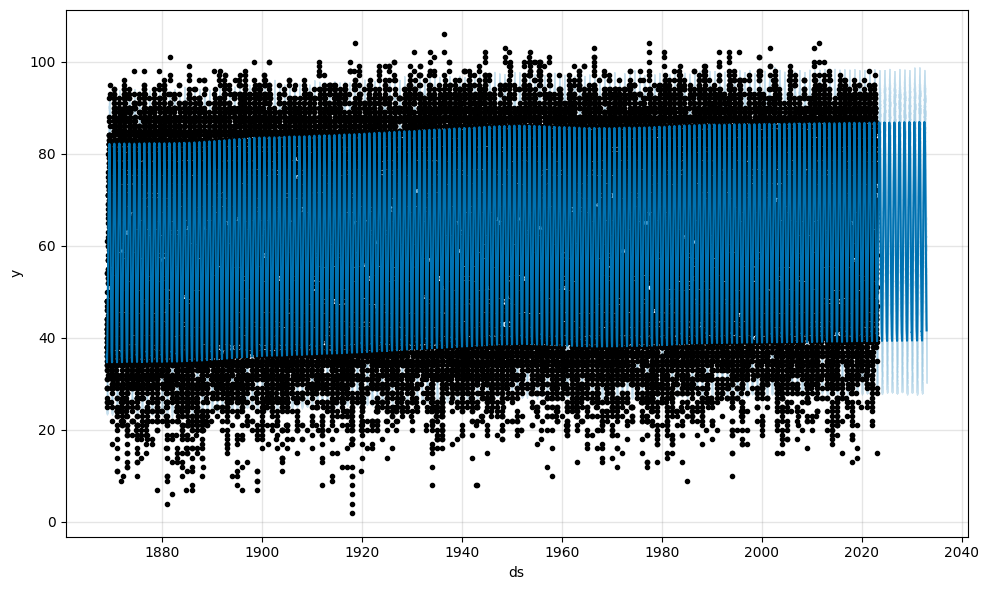

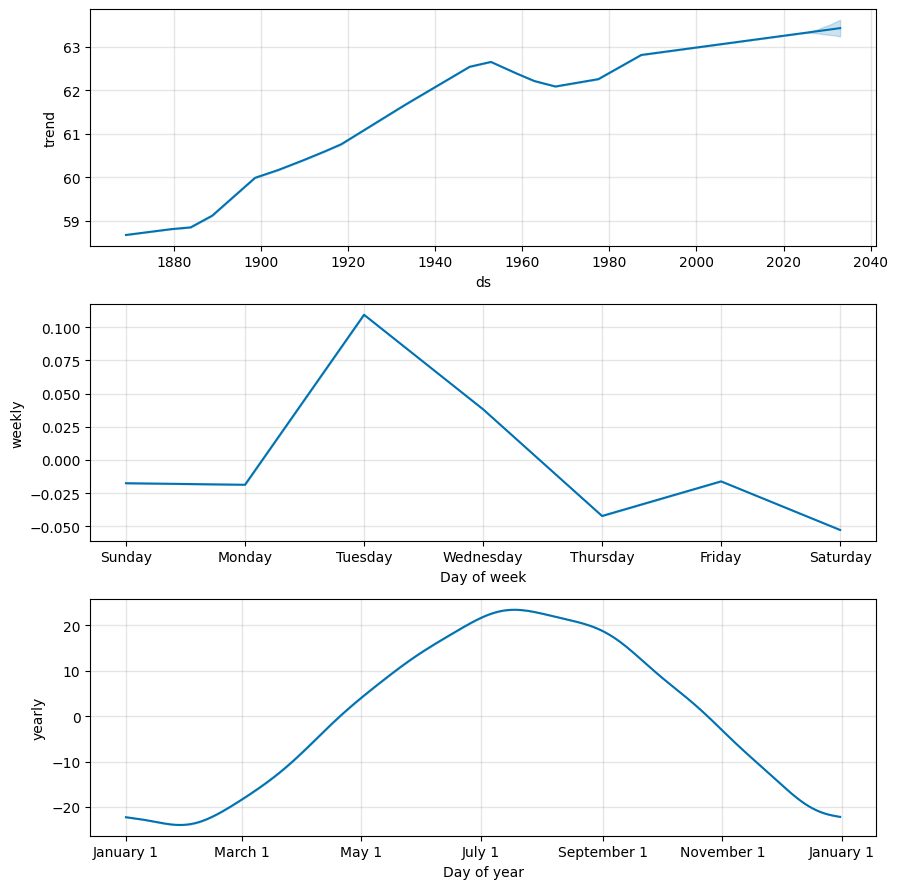

In [72]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

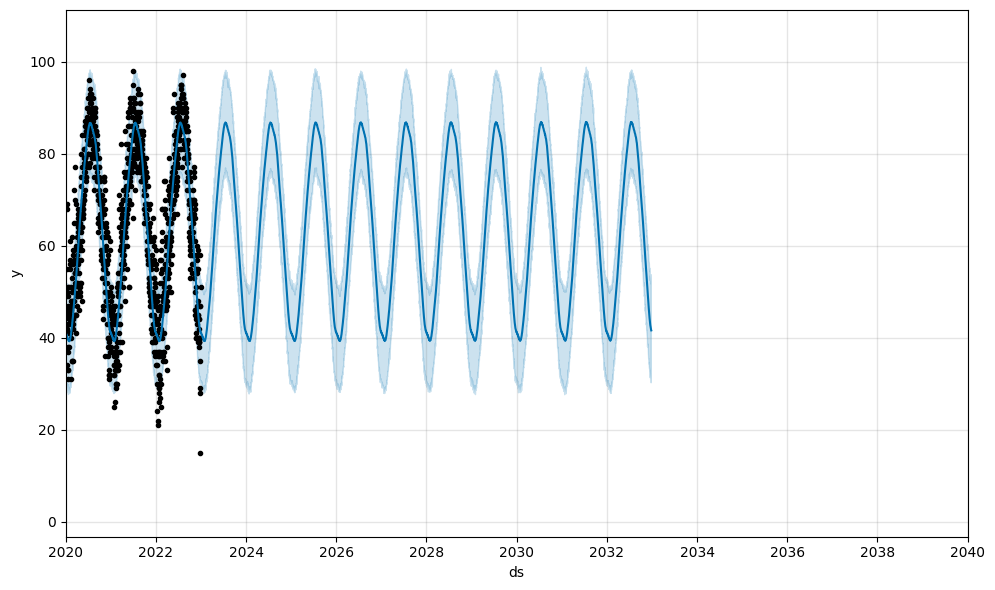

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'forecast' is your forecast dataframe and 'model' is your trained Prophet model

# Create the plot
fig1 = model.plot(forecast)

# Convert string dates to datetime objects
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2040-01-01')

# Adjust the x-axis to display data from 2020 to 2040
plt.xlim(start_date, end_date)

# Show the plot
plt.show()